# Italian Restaurants: Toronto vs. NY

## Project Background:

A growing Italian restaurant chain is looking to open a new location. So far, restaurants have been located in the Canadian cities of Quebec, Quebec City, Vancouver, and Ottawa. Now, the restaurant’s founder is thinking about expanding to the US through a New York location. However, she’s wondering if she should hold off on an international expansion for now and instead locate the new restaurant in Toronto. Moreover, once she decides between New York and Toronto, she needs to select the best neighborhood to open the restaurant in.

## Business Problem:

In order to answer the question, “Where should the new restaurant in the growing Italian restaurant chain be located?”, the founder needs access to some key information about Italian restaurants in the cities of New York and Toronto. This includes the amount of Italian restaurants in each city relative to their size, the individual neighborhoods with the most/least Italian restaurants, and the rankings of said restaurants. Follow along below to see how I navigate this problem.

# Import Required Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude 

from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html

from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # plotting library

from sklearn.cluster import KMeans # import KMeans from clustering stage

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

# All requested packages already installed.



# Scrape Toronto data wiki page

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')
table = str(soup.find('table'))
from IPython.display import display_html
display_html(table, raw = True)

M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)
M1CScarborough(Rouge Hill / Port Union / Highland Creek),M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood)
M1EScarborough(Guildwood / Morningside / West Hill),M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights / Downsview North),M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union Station / Toronto Islands),M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
M1KScarborough(Kennedy Park / Ionview / East Birchmount Park),M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / Design Exchange),M6KWest Toronto(Brockton / Parkdale Village / Exhibition Place),M7KNot assigned,M8KNot assigned,M9KNot assigned
M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria Hotel),M6LNorth York(North Park / Maple Leaf Park / Upwood Park),M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
M1MScarborough(Cliffside / Cliffcrest / Scarborough Village West),M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and Silverthorn),M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)
M1NScarborough(Birch Cliff / Cliffside West),M2NNorth York(Willowdale)South,M3NNorth York(Downsview)Northwest,M4NCentral Toronto(Lawrence Park),M5NCentral Toronto(Roselawn),M6NYork(Runnymede / The Junction North),M7NNot assigned,M8NNot assigned,M9NYork(Weston)


In [4]:
# puts data in the correct format

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append({'Postal Code':cell['PostalCode'],'Borough':cell['Borough'],'Neighborhood':cell['Neighborhood']})

In [5]:
df = pd.DataFrame(table_contents)
df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [6]:
df2 = pd.DataFrame(table_contents,columns = ['Postal Code','Borough','Neighborhood'])
df2['Borough']=df2['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [7]:
df2.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


# Getting the latitude and longitude of each neighborhood¶

In [8]:
# create a dataframe with the postal code data from the csv file

locgeo_df = pd.read_csv('https://cocl.us/Geospatial_data', index_col='Postal Code')
locgeo_df.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [9]:
# grouping the original dataframe by postcode

df_postcode = df2.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_postcode.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [10]:
# merging the dataframes 

final_data = df_postcode.join(locgeo_df, on='Postal Code') 
final_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [11]:
# Make a dataframe with just the boroughs that contain the word Toronto

toronto_data = final_data[final_data['Borough'].str.contains('Toronto',regex=False)]
toronto_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
40,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


# Exploring the Toronto neighborhoods

In [12]:
CLIENT_ID = '0QBDDIG2ZXVQAYANLVFQOZYJ2YABNSHTBPNLEYHSJLCNWXF0' # your Foursquare ID
CLIENT_SECRET = '1LFYNORKRDQ5R2IFGKXLMDJOKMHZ2VOVK5FEAA1OEYSDV1O0' # your Foursquare Secret
ACCESS_TOKEN = '4K2T4N0T41AVZKS1CJLTDO2QDJWAODHAV2MIZBQDKHEQ5MI3'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0QBDDIG2ZXVQAYANLVFQOZYJ2YABNSHTBPNLEYHSJLCNWXF0
CLIENT_SECRET:1LFYNORKRDQ5R2IFGKXLMDJOKMHZ2VOVK5FEAA1OEYSDV1O0


In [13]:
# create a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
# create a function that gets nearby venues for all Toronto neighborhoods

def getNearbyVenues(boroughs, neighborhoods, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, neighborhood, lat, lng in zip(boroughs, neighborhoods, latitudes, longitudes):
        print(neighborhood)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
               # return only relevant information for each nearby venue
        venues_list.append([(
            borough, 
            neighborhood,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue ID',           
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# run the above function on each neighborhood and create new dataframe

toronto_venues = getNearbyVenues(boroughs=toronto_data['Borough'],
                                   neighborhoods=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth  East
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Enclave of M5E
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction 

In [17]:
toronto_venues.to_csv('toronto_venues_tocsvl.csv')
toronto = pd.read_csv('toronto_venues_tocsvl.csv')

In [18]:
toronto.head()

,Unnamed: 0,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,0,East Toronto,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,4ad4c062f964a52011f820e3,43.678879,-79.297734,Health Food Store
1,1,East Toronto,The Beaches,43.676357,-79.293031,Grover Pub and Grub,4b8daea1f964a520480833e3,43.679181,-79.297215,Pub
2,2,East Toronto,The Beaches,43.676357,-79.293031,Williamson Road Playground,4c0a537d340720a1702b8693,43.674716,-79.297338,Playground
3,3,East Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,4df91c4bae60f95f82229ad5,43.680563,-79.292869,Neighborhood
4,4,East York/East Toronto,The Danforth East,43.685347,-79.338106,The Path,4cce390d566aa0931d592cfd,43.683923,-79.335007,Park


In [19]:
# check how many Italian restaurants were returned for each neighborhood that has at least one Italian restaurant

italian_data = toronto.loc[toronto['Venue Category'] == 'Italian Restaurant']
restaurant_counts = italian_data.groupby('Neighborhood').count()
restaurant_counts

,Unnamed: 0,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,,,
Berczy Park,1,1,1,1,1,1,1,1,1
"Brockton, Parkdale Village, Exhibition Place",1,1,1,1,1,1,1,1,1
Central Bay Street,3,3,3,3,3,3,3,3,3
Christie,1,1,1,1,1,1,1,1,1
"Commerce Court, Victoria Hotel",2,2,2,2,2,2,2,2,2
Davisville,1,1,1,1,1,1,1,1,1
Enclave of M5E,4,4,4,4,4,4,4,4,4
"First Canadian Place, Underground city",1,1,1,1,1,1,1,1,1
"Garden District, Ryerson",2,2,2,2,2,2,2,2,2


In [20]:
# get the total number of Italian restaurants in Toronto
num_toronto = italian_data['Venue Category'].count().sum()

# divide number of restaurants by the size of Toronto to get the number of Italian restaurants per sq. mile
num_toronto/243.3

0.14796547472256472

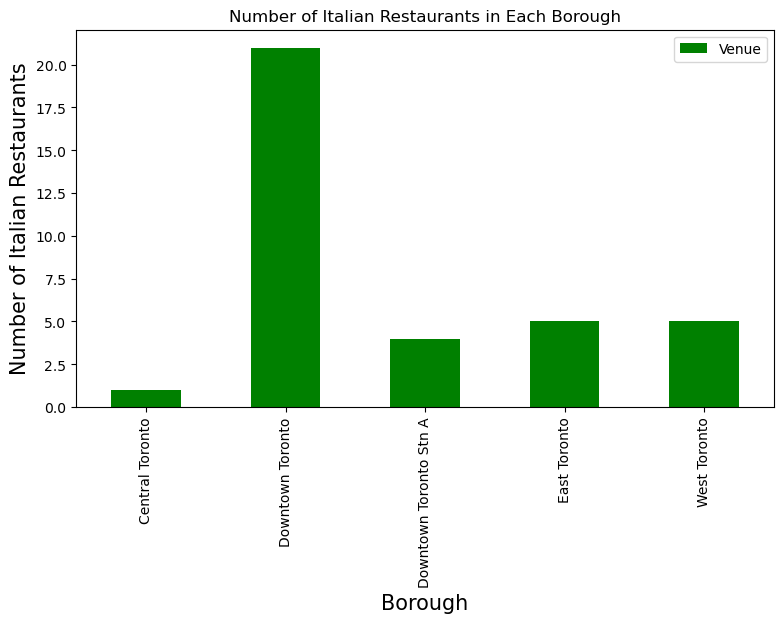

In [21]:
# make a graph to visualize the number of Italian restaurants in each borough

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Italian Restaurants in Each Borough')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Italian Restaurants', fontsize=15)
italian_data.groupby('Borough').count()['Venue'].plot(kind='bar', color='green')
plt.legend()
plt.show()

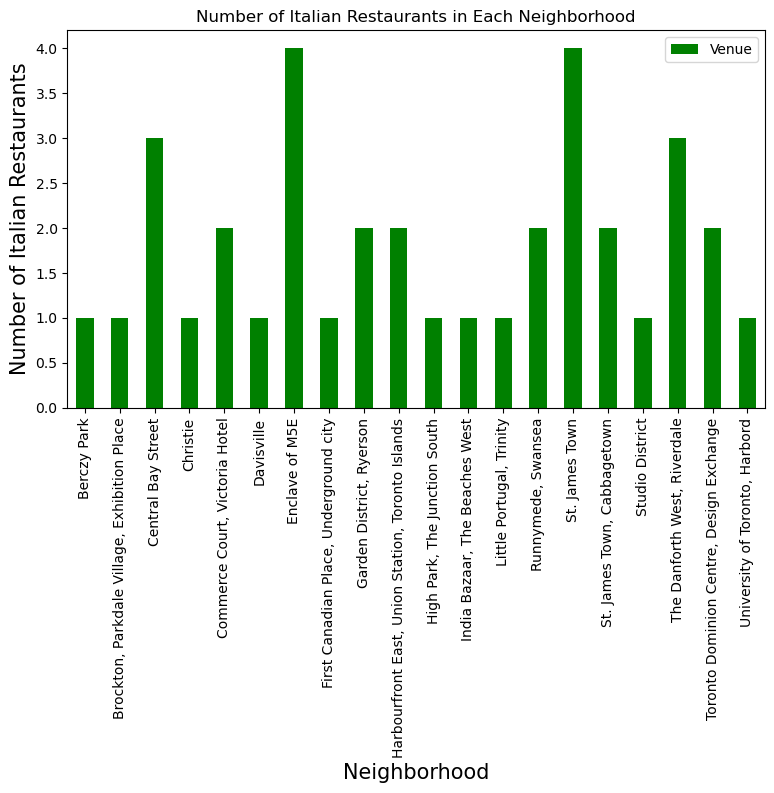

In [22]:
# make a graph to visualize the number of Italian restaurants in each neighborhood

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Italian Restaurants in Each Neighborhood')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Italian Restaurants', fontsize=15)
italian_data.groupby('Neighborhood').count()['Venue'].plot(kind='bar', color='green')
plt.legend()
plt.show()

In [23]:
# get coordinates of Toronto

address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [24]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue, neighborhood in zip(italian_data['Venue Latitude'], italian_data['Venue Longitude'], italian_data['Venue'], italian_data['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Get the average rating of Toronto restaurants

In [25]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_rating=venue_data['rating']
        venue_details.append(venue_rating)
    except KeyError:
        pass
    return venue_details[0]

In [26]:
column_names=['Rating']
italian_rest_stats_tor=pd.DataFrame(columns=column_names)
for ID in italian_data['Venue ID']:
    try:
        venue_details=get_venue_details(ID)
        rating = venue_details
        print(rating)
    except KeyError:
        print('No data available for id=', ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        rating = [0]*5
    italian_rest_stats_tor = italian_rest_stats_tor.append({
                                                'Rating' : rating,
                                               }, ignore_index=True)

{'meta': {'code': 200, 'requestId': '60c4d26f3efa1124be3bd73b'}, 'response': {'venue': {'id': '4e3dbb5e45dd68e3273e03b7', 'name': 'Cafe Fiorentina', 'contact': {'phone': '4168554240', 'formattedPhone': '(416) 855-4240'}, 'location': {'address': '463 Danforth Ave', 'crossStreet': 'Logan Ave', 'lat': 43.677743, 'lng': -79.350115, 'labeledLatLngs': [{'label': 'display', 'lat': 43.677743, 'lng': -79.350115}], 'postalCode': 'M4K 1P1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['463 Danforth Ave (Logan Ave)', 'Toronto ON M4K 1P1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-fiorentina/4e3dbb5e45dd68e3273e03b7', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'url': 'https://fiorentinare

In [27]:
italian_rest_stats_tor.to_csv('italian_rest_stats_tor_tocsvl.csv')
stats_tor = pd.read_csv('italian_rest_stats_tor_tocsvl.csv')

In [28]:
stats_tor.head()

,Unnamed: 0,Rating
0,0,8.8
1,1,8.3
2,2,7.0
3,3,7.2
4,4,8.0


In [29]:
stats_tor['Rating'].mean()

7.486111111111111

# Load and Transform New York City Data

In [31]:
# download data

!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [32]:
# load data

import json

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [33]:
# get relevant data

neighborhoods_data = newyork_data['features']

In [34]:
# transform the data into a dataframe

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_data = pd.DataFrame(columns=column_names)

ny_data

,Borough,Neighborhood,Latitude,Longitude


In [35]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_data = ny_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [36]:
# run getNearbyVenues function on each neighborhood and create new dataframe

ny_venues = getNearbyVenues(boroughs=ny_data['Borough'],
                                   neighborhoods=ny_data['Neighborhood'],
                                   latitudes=ny_data['Latitude'],
                                   longitudes=ny_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [37]:
ny_venues.to_csv('ny_venues_tocsvl.csv')
new_york = pd.read_csv('ny_venues_tocsvl.csv')

In [38]:
# check how many Italian restaurants were returned for each neighborhood that has at least one Italian restaurant

italian_data_ny = new_york.loc[ny_venues['Venue Category'] == 'Italian Restaurant']
restaurant_counts_ny = italian_data_ny.groupby('Neighborhood').count()
restaurant_counts_ny

,Unnamed: 0,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,,,
Arrochar,2,2,2,2,2,2,2,2,2
Astoria,2,2,2,2,2,2,2,2,2
Astoria Heights,1,1,1,1,1,1,1,1,1
Auburndale,2,2,2,2,2,2,2,2,2
Bath Beach,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
West Village,11,11,11,11,11,11,11,11,11
Williamsburg,1,1,1,1,1,1,1,1,1
Windsor Terrace,1,1,1,1,1,1,1,1,1


In [39]:
italian_data_ny.head()

,Unnamed: 0,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
153,153,Bronx,Woodlawn,40.898273,-73.867315,Patrizia's Of Woodlawn,511edb6de4b0d58346fd272d,40.900638,-73.867724,Italian Restaurant
232,232,Bronx,Pelham Parkway,40.857413,-73.854756,Enzo's,4bf96ae65317a593d837017f,40.854232,-73.854362,Italian Restaurant
243,243,Bronx,Pelham Parkway,40.857413,-73.854756,Pasta Pasta,4b47f069f964a5208c4426e3,40.854788,-73.854929,Italian Restaurant
255,255,Bronx,City Island,40.847247,-73.786488,Artie's Steak and Seafood,4514ed4df964a520e5391fe3,40.849542,-73.787317,Italian Restaurant
286,286,Bronx,Bedford Park,40.870185,-73.885512,Jolly Tinker,4b1712a8f964a520dbc123e3,40.867451,-73.883536,Italian Restaurant


In [40]:
# get the total number of Italian restaurants in New York
num_ny = italian_data_ny['Venue Category'].count().sum()

# divide number of restaurants by the size of New York to get the number of Italian restaurants per sq. mile
num_ny/302.6

0.9980171844018505

Clearly, New York has many more Italian restaurants per square mile than New York. But to find out which city is the better choice, we also need to take into account how well these restaurants are doing. 

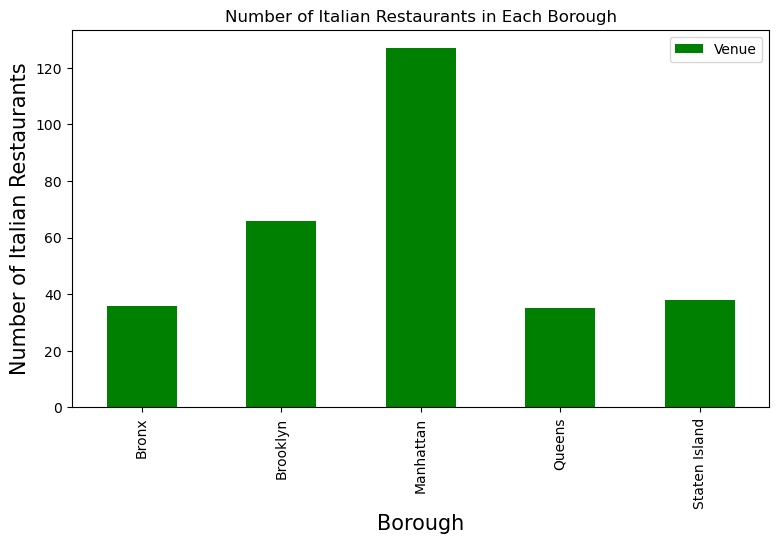

In [41]:
# make a graph to visualize the number of Italian restaurants in each borough

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Italian Restaurants in Each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Italian Restaurants', fontsize=15)
italian_data_ny.groupby('Borough').count()['Venue'].plot(kind='bar', color='green')
plt.legend()
plt.show()

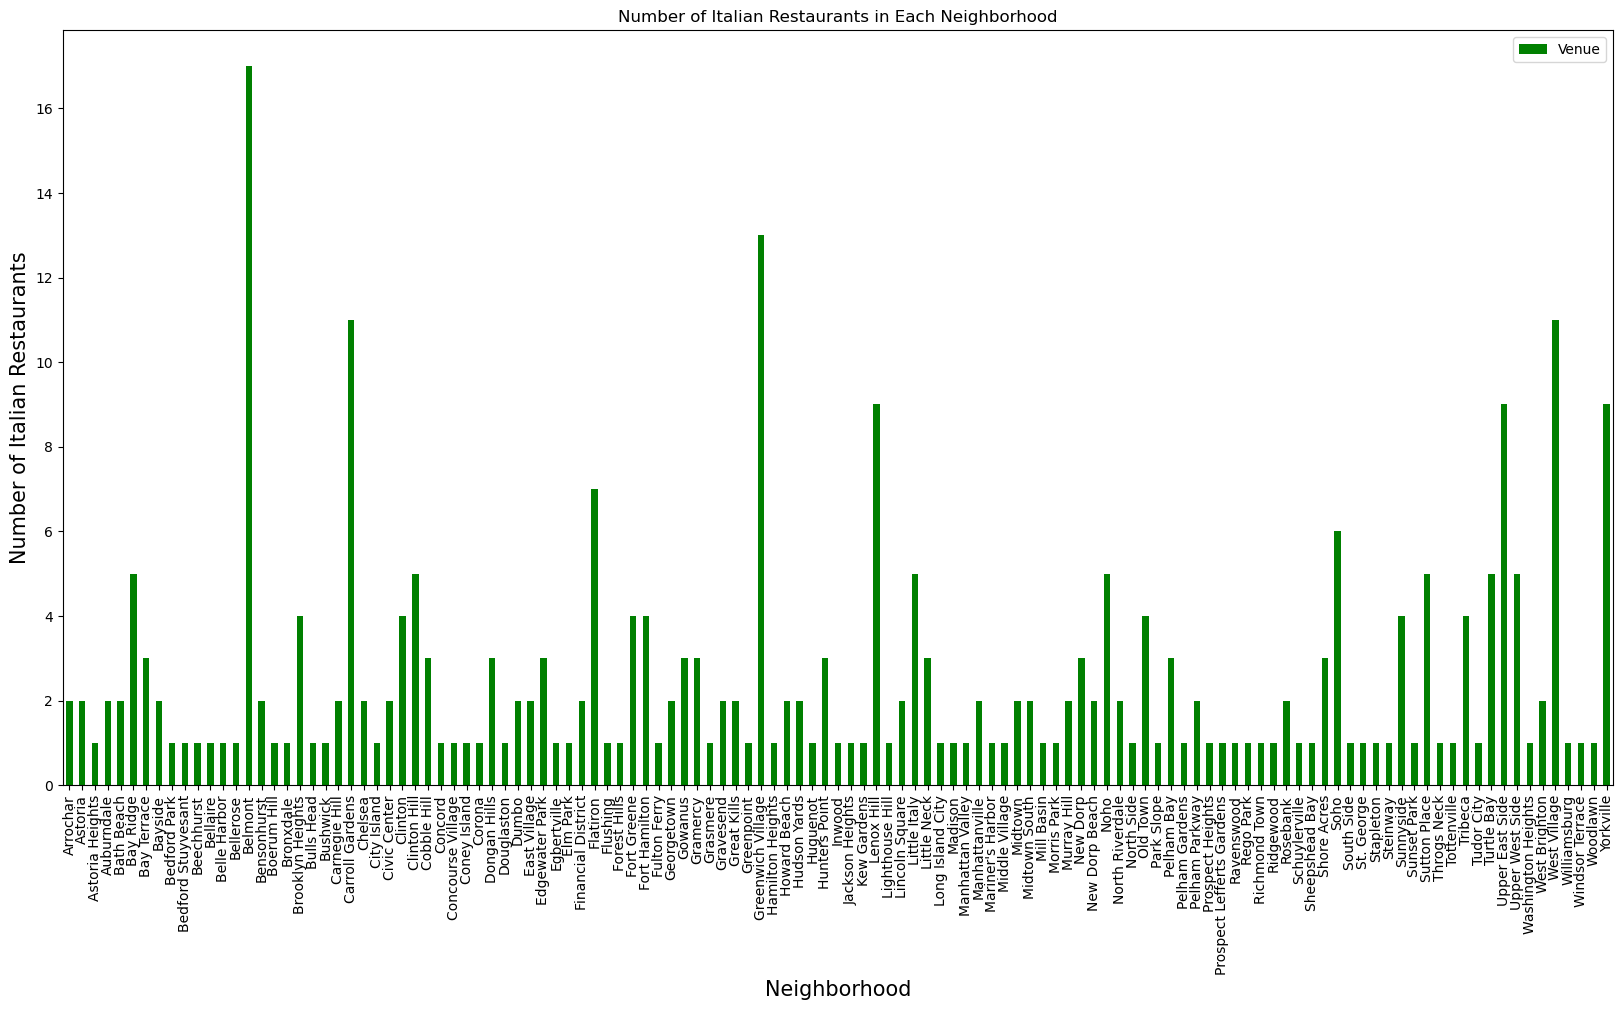

In [45]:
# make a graph to visualize the number of Italian restaurants in each neighborhood

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10), dpi = 100)
plt.title('Number of Italian Restaurants in Each Neighborhood')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Italian Restaurants', fontsize=15)
italian_data_ny.groupby('Neighborhood').count()['Venue'].plot(kind='bar', color='green')
plt.legend()
plt.show()

In [46]:
# get coordinates of New York

address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [47]:
# create map of NY using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue, neighborhood in zip(italian_data_ny['Venue Latitude'], italian_data_ny['Venue Longitude'], italian_data_ny['Venue'], italian_data_ny['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

# Get the average rating of NY restaurants

In [119]:
column_names=['Rating']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
for ID in italian_data_ny['Venue ID']:
    try:
        venue_details=get_venue_details(ID)
        rating = venue_details
        print(rating)
    except KeyError:
        print('No data available for id=', ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        rating = [0]*5
    italian_rest_stats_ny = italian_rest_stats_ny.append({
                                                'Rating' : rating,
                                               }, ignore_index=True)

{'meta': {'code': 200, 'requestId': '60c427cef98c8c24c07b58e2'}, 'response': {'venue': {'id': '511edb6de4b0d58346fd272d', 'name': "Patrizia's Of Woodlawn", 'contact': {'phone': '7188845700', 'formattedPhone': '(718) 884-5700'}, 'location': {'address': '4358 Katonah Ave', 'lat': 40.900638399332884, 'lng': -73.86772361835486, 'labeledLatLngs': [{'label': 'display', 'lat': 40.900638399332884, 'lng': -73.86772361835486}, {'label': 'entrance', 'lat': 40.900601, 'lng': -73.867611}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4358 Katonah Ave', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-woodlawn/511edb6de4b0d58346fd272d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}],

IndexError: list index out of range

In [122]:
italian_rest_stats_ny.head()

,Rating
0,8.6
1,8.6
2,6.3
3,8.3
4,7.6


In [123]:
italian_rest_stats_ny['Rating'].mean()

7.821428571428571

# Analysis

## Which city?

While Toronto has ~0.15 Italian restaurants per sq. mile and an average rating of ~7.5, New York has ~0.1 Italian restaurants per sq. mile and an average rating of ~7.8. So even though New York has many more Italian restaurants than Toronto, indicating more competition for the Italian restaurant chain owner, the higher average rating suggests that these restaurants are doing well and that there is a demand for Italian food. Based off of these stats alone, it seems that the owner should consider locating the restaurant in New York. However, it would also be helpful for the owner to know other information such as the average price to rent a restaurant space in each city, what it might cost to higher workers in each city, whether new restaurants tend to survive in each city, and even how COVID has affected restaurant popularity/success in each city.

## Which neighborhood?

Should the owner locate the new restaurant in New York, she has some options for specific locations. She could potentially put the restaurant in one of the boroughs that has the least Italian restaurans (Queens, the Bronx, or Staten Island), but in a neighborhood such as Astoria or North Riverdale that has a higher than average number of Italian restaurants for those boroughs. This would allow her to face less overall competition from from other restaurants in the borough, but still be in a neighborhood where Italian food is in demand. Alternatively, she could locate the restaurant in Manhattan or Brooklyn (these are the boroughs with the most Italian restaurants) in a neighborhood that has a lower than average number of Italian restaurants, such as Chelsea or Park Slope. This way, she'd face less competition within the neighborhood, but be in a borough where Italian restaurants tend to survive and thrive.